<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, f1_score, roc_curve
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

<h2>Data Preparation</h2>

In [2]:
# Reading the csv file.
df = pd.read_csv('CHEMBL203_EGFR_2class_pubchem_fp.csv')
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active


<h2>Data Cleaning</h2>

In [4]:
print(df.dtypes)

PubchemFP0            int64
PubchemFP1            int64
PubchemFP2            int64
PubchemFP3            int64
PubchemFP4            int64
                      ...  
PubchemFP877          int64
PubchemFP878          int64
PubchemFP879          int64
PubchemFP880          int64
bioactivity_class    object
Length: 882, dtype: object


In [3]:
df.isna().sum()

PubchemFP0           0
PubchemFP1           0
PubchemFP2           0
PubchemFP3           0
PubchemFP4           0
                    ..
PubchemFP877         0
PubchemFP878         0
PubchemFP879         0
PubchemFP880         0
bioactivity_class    0
Length: 882, dtype: int64

In [4]:
df.isnull().sum()

PubchemFP0           0
PubchemFP1           0
PubchemFP2           0
PubchemFP3           0
PubchemFP4           0
                    ..
PubchemFP877         0
PubchemFP878         0
PubchemFP879         0
PubchemFP880         0
bioactivity_class    0
Length: 882, dtype: int64

In [5]:
df.shape

(2377, 882)

In [6]:
df['bioactivity_class'].value_counts()

active      1191
inactive    1186
Name: bioactivity_class, dtype: int64

In [8]:
pd.get_dummies(df['bioactivity_class'])

,active,inactive
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2372,0,1
2373,0,1
2374,0,1
2375,0,1


In [7]:
# Train-Test split
x = df.iloc[:,:881]
y = pd.get_dummies(df['bioactivity_class'])['active']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [4]:
len(x_train.keys())

881

<h2>Data Modeling</h2>

In [ ]:
# Decision Tree
# Hyper-tunning the 'criterion', 'max_depth', 'min_sample_leaf' and 'min_sample_split' parameter
values = [i for i in range(1, 21)]
train_scores = []
test_scores = []
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth=i, criterion = 'entropy', random_state=25)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

In [ ]:
for i in range(10, 110, 10):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=10)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    dt_acc = accuracy_score(y_test, pred)
    print(i, dt_acc)

In [ ]:
# KNN
# Hyper-tunning the 'n_neighbors' parameter
neighbors = list(range(1,21,1))
knn_accuracy_test = []
knn_accuracy_train = []
knn_df = pd.DataFrame(columns=['n_neighbors', 'test_Accuracy', 'train_accuracy'])
for i in neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train, y_train)
    knn_pred = knn_clf.predict(x_test)
    knn_acc = accuracy_score(y_test, knn_pred)
    knn_accuracy_test.append(knn_acc)
    knn_pred = knn_clf.predict(x_train)
    knn_acc = accuracy_score(y_train, knn_pred)
    knn_accuracy_train.append(knn_acc)
    
knn_df['n_neighbors'] = neighbors
knn_df['test_Accuracy'] = knn_accuracy_test
knn_df['train_accuracy'] = knn_accuracy_train
knn_df['difference'] = abs(knn_df['test_Accuracy'].values - knn_df['train_accuracy'].values)
k_best, k_accu_best = knn_df.sort_values(['difference', 'test_Accuracy'], ascending=[True, False]).head(1)[['n_neighbors', 'test_Accuracy']].values[0]
print("Best Parameter for KNN, k =", k_best)
plt.plot(neighbors, knn_accuracy_test, label='test data', marker='o')
plt.plot(neighbors, knn_accuracy_train, label='train data', marker='o')
plt.plot(k_best, k_accu_best, marker='o', color='red')
plt.grid() 
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("For K-Nearest Neighbors")
plt.legend(loc='upper right')
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)
knn_pred = knn_clf.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_acc

In [ ]:
# Support Vector Classifier(SVC)
from sklearn.svm import SVC
# Hyper-tunning the 'kernel' and 'gamma' parameter
svc_dict = {'auto': ['linear'], 'scale': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_accuracy_test = []
svc_accuracy_train = []
svc_df = pd.DataFrame(columns=['Parameters', 'test_Accuracy', 'train_Accuracy'])
parameter = []
cnt = []
count = 0
for i in svc_dict:
    for j in svc_dict[i]:
        count+=1
        svc_clf = SVC(kernel=j, gamma=i, random_state=100)
        svc_clf.fit(x_train, y_train)
        svc_pred = svc_clf.predict(x_test)
        svc_acc = accuracy_score(y_test, svc_pred)
        svc_accuracy_test.append(svc_acc)
        svc_pred = svc_clf.predict(x_train)
        svc_acc = accuracy_score(y_train, svc_pred)
        svc_accuracy_train.append(svc_acc)
        cnt.append(count)
        para = '[kernel = '+str(i)+', gamma = '+str(j)+']'
        parameter.append(para)
svc_df['Parameters'] = parameter
svc_df['test_Accuracy'] = svc_accuracy_test
svc_df['train_Accuracy'] = svc_accuracy_train
svc_df['difference'] = abs(svc_df['test_Accuracy'] - svc_df['train_Accuracy'])
svc_df["count"] = cnt

svc_best, svc_accu_best, best_para = svc_df.sort_values(['difference', 'test_Accuracy'], ascending=[True, False]).head(1)[['count', 'test_Accuracy', 'Parameters']].values[0]
print('Best Parameter for Support Vector Machine(SVC) = ', best_para)
plt.plot(cnt, svc_accuracy_test, label='test_data', marker ='o')
plt.plot(cnt, svc_accuracy_train, label='train_data', marker='o')
plt.plot(svc_best, svc_accu_best, marker='o', color='red')
plt.grid()
plt.xlabel("Various Parameters")
plt.ylabel("Accuracy")
plt.title("For SVC")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# import pickle
# with open("dt.pkl", "wb") as file:
#     pickle.dump(clf, file)

In [ ]:
# import pickle
# with open("dt.pkl", "rb") as file:
#     pickle.dump(clf, file)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Hyper-tunning the 'penalty' and 'solver' parameter
lr_dict = {'l1': ['liblinear', 'saga'], 'l2': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_accuracy_test = []
lr_accuracy_train = []
lr_accuracy_cv = []
lr_df = pd.DataFrame(columns=['Parameters', 'test_Accuracy', 'train_Accuracy'])
parameter = []
cnt = []
count = 0
for i in lr_dict:
    for j in lr_dict[i]:
        count+=1
        lr_clf = LogisticRegression(penalty=i, solver=j, random_state=120)
        lr_clf.fit(x_train, y_train)
        lr_pred = lr_clf.predict(x_test)
        lr_acc = accuracy_score(y_test, lr_pred)
        lr_accuracy_test.append(lr_acc)
        lr_pred = lr_clf.predict(x_train)
        lr_acc = accuracy_score(y_train, lr_pred)
        lr_accuracy_train.append(lr_acc)
        cnt.append(count)
        para = '[penalty = '+str(i)+', solver = '+str(j)+']'
        parameter.append(para)

lr_df['Parameters'] = parameter
lr_df['test_Accuracy'] = lr_accuracy_test
lr_df['train_Accuracy'] = lr_accuracy_train
lr_df['difference'] = abs(lr_df['test_Accuracy'] - lr_df['train_Accuracy'])
lr_df["count"] = cnt

lr_best, lr_accu_best, best_para = lr_df.sort_values(['difference', 'test_Accuracy'], ascending=[True, False]).head(1)[['count', 'test_Accuracy', 'Parameters']].values[0]
print('Best Parameters for Logistic Regression =', best_para)
plt.plot(cnt, lr_accuracy_test, label='test_data', marker ='o')
plt.plot(cnt, lr_accuracy_train, label='train_data', marker='o')
plt.plot(lr_best, lr_accu_best, marker='o', color='red')
plt.grid()
plt.xlabel("Various Parameters")
plt.ylabel("Accuracy")
plt.title("For Logistic Regression")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# XGBooster Classifier
# from xgboost import XGBClassifier
# clf = XGBClassifier()
# clf.fit(x_train, y_train)
# pred = clf.predict(x_test)
# print("Accuracy for XGBooster:",accuracy_score(y_test, pred))

In [ ]:
# Confusion Matrix from Random-Forest Classifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("Accuracy for Random-Forest:",accuracy_score(y_test, pred))
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred)
group_names = ['True Pos', 'False Neg', 'False Pos', 'True Neg']
group_counts = cf_matrix.flatten()
group_percentages = np.round(cf_matrix.flatten()/sum(cf_matrix.flatten()), 2)
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# group_names = ['True Pos', 'False Neg', 'False Pos', 'True Neg']
sns.heatmap(cf_matrix, annot =True,cmap='Blues', fmt='')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0


In [36]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=150, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

In [37]:
# Deep Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001))
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=callback)

Epoch 1/500
48/48 [==============================] - 0s 9ms/step - loss: 1.0137 - accuracy: 0.5605 - val_loss: 0.8669 - val_accuracy: 0.7192
Epoch 2/500
48/48 [==============================] - 0s 6ms/step - loss: 0.8607 - accuracy: 0.6487 - val_loss: 0.7178 - val_accuracy: 0.7874
Epoch 3/500
48/48 [==============================] - ETA: 0s - loss: 0.7574 - accuracy: 0.72 - 0s 5ms/step - loss: 0.7605 - accuracy: 0.7270 - val_loss: 0.6400 - val_accuracy: 0.8136
Epoch 4/500
48/48 [==============================] - 0s 8ms/step - loss: 0.6635 - accuracy: 0.7914 - val_loss: 0.5997 - val_accuracy: 0.8425
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.5884 - accuracy: 0.8408 - val_loss: 0.5784 - val_accuracy: 0.8320
Epoch 6/500
48/48 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.8592 - val_loss: 0.5408 - val_accuracy: 0.8688
Epoch 7/500
48/48 [==============================] - 0s 5ms/step - loss: 0.5032 - accuracy: 0.8717 - val_loss: 0

48/48 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9947 - val_loss: 0.5468 - val_accuracy: 0.9160
Epoch 116/500
48/48 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9934 - val_loss: 0.5530 - val_accuracy: 0.9134
Epoch 117/500
48/48 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9888 - val_loss: 0.6111 - val_accuracy: 0.8793
Epoch 118/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9855 - val_loss: 0.6541 - val_accuracy: 0.8976
Epoch 119/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1074 - accuracy: 0.9842 - val_loss: 0.7618 - val_accuracy: 0.8530
Epoch 120/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0987 - accuracy: 0.9895 - val_loss: 0.5393 - val_accuracy: 0.8924
Epoch 121/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0894 - accuracy: 0.9921 - val_loss: 0.5280 - val_accuracy: 0.9134
Epoch 122/500

48/48 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.9934 - val_loss: 0.5023 - val_accuracy: 0.9186
Epoch 230/500
48/48 [==============================] - 0s 3ms/step - loss: 0.0953 - accuracy: 0.9895 - val_loss: 0.5518 - val_accuracy: 0.9003
Epoch 231/500
48/48 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.9829 - val_loss: 0.5785 - val_accuracy: 0.8950
Epoch 232/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9849 - val_loss: 0.5712 - val_accuracy: 0.8976
Epoch 233/500
48/48 [==============================] - 0s 6ms/step - loss: 0.0907 - accuracy: 0.9901 - val_loss: 0.4753 - val_accuracy: 0.9134
Epoch 234/500
48/48 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9961 - val_loss: 0.5013 - val_accuracy: 0.9186
Epoch 235/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0832 - accuracy: 0.9941 - val_loss: 0.5936 - val_accuracy: 0.9029
Epoch 236/500

48/48 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9961 - val_loss: 0.5397 - val_accuracy: 0.9055
Epoch 344/500
48/48 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9954 - val_loss: 0.5266 - val_accuracy: 0.9029
Epoch 345/500
48/48 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9947 - val_loss: 0.6564 - val_accuracy: 0.8845
Epoch 346/500
48/48 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9849 - val_loss: 0.5005 - val_accuracy: 0.9134
Epoch 347/500
48/48 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9954 - val_loss: 0.4980 - val_accuracy: 0.9239
Epoch 348/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0750 - accuracy: 0.9947 - val_loss: 0.5660 - val_accuracy: 0.9108
Epoch 349/500
48/48 [==============================] - 0s 5ms/step - loss: 0.0708 - accuracy: 0.9941 - val_loss: 0.5280 - val_accuracy: 0.9186
Epoch 350/500

In [40]:
np.mean(history.history["accuracy"])

0.9832347569843898

In [41]:
np.mean(history.history["val_accuracy"])

0.9008366141754848

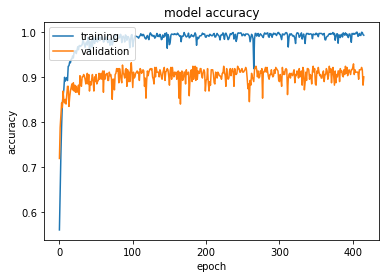

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

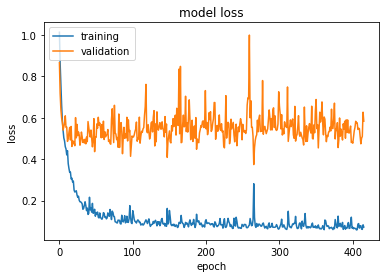

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Gradient-Boost Classifier
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
acc_gb = accuracy_score(y_test, pred)
print("Accuracy for GradientBoosting:",acc_gb)

In [ ]:
import pickle
with open("knn.pkl", "wb") as file:
    pickle.dump(knn_clf, file)

In [44]:
model.save('dnn.h5')

In [ ]:
all_accuracy = [dt_ac, knn_acc, lr_ac, rf_ac, svc_ac, gb_ac, np.mean(history.history["val_accuracy"])]
models = ["Decision-Tree", "KNN", "Logistic", "Random-Forest", "SVM", "Gradient Boosting", "DNN"]
data = {'Models':models, 'Accuracy':all_accuracy}
dfg = pd.DataFrame(data, columns=['Models',"Accuracy"])
display(dfg.style.apply(lambda x: ['background: lightblue' if i == max(dfg["Accuracy"]) else '' for i in dfg["Accuracy"]]))

In [ ]:
# x_train.to_csv('x_train.csv')
# y_train.to_csv('y_train.csv')
# x_test.to_csv('x_test.csv')
# y_test.to_csv('y_test.csv')

In [45]:
# Testing all the models on the test dataset.
x_train = pd.read_csv('x_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
x_test = pd.read_csv('x_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()



import pickle
with open("svc.pkl", 'rb') as file:
    pickle_model_svc = pickle.load(file)
svc_ac = accuracy_score(y_test, pickle_model_svc.predict(x_test))
svc_precision = precision_score(y_test, pickle_model_svc.predict(x_test))
svc_recall = recall_score(y_test, pickle_model_svc.predict(x_test))
svc_f1 = f1_score(y_test, pickle_model_svc.predict(x_test))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, pickle_model_svc.predict(x_test)) 
svc_auc = auc(svc_fpr, svc_tpr)
                          

with open("rf.pkl", 'rb') as file:
    pickle_model_rf = pickle.load(file)

with open("lr.pkl", 'rb') as file:
    pickle_model_lr = pickle.load(file)
lr_ac = accuracy_score(y_test, pickle_model_lr.predict(x_test))
lr_precision = precision_score(y_test, pickle_model_lr.predict(x_test))
lr_recall = recall_score(y_test, pickle_model_lr.predict(x_test))
lr_f1 = f1_score(y_test, pickle_model_lr.predict(x_test))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, pickle_model_lr.predict(x_test)) 
lr_auc = auc(lr_fpr, lr_tpr)

with open("gb.pkl", 'rb') as file:
    pickle_model_gb = pickle.load(file)
gb_ac = accuracy_score(y_test, pickle_model_gb.predict(x_test))
gb_precision = precision_score(y_test, pickle_model_gb.predict(x_test))
gb_recall = recall_score(y_test, pickle_model_gb.predict(x_test))
gb_f1 = f1_score(y_test, pickle_model_gb.predict(x_test))
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, pickle_model_gb.predict(x_test)) 
gb_auc = auc(gb_fpr, gb_tpr)

with open("dt.pkl", 'rb') as file:
    pickle_model_dt = pickle.load(file)
dt_ac = accuracy_score(y_test, pickle_model_dt.predict(x_test))
dt_precision = precision_score(y_test, pickle_model_dt.predict(x_test))
dt_recall = recall_score(y_test, pickle_model_dt.predict(x_test))
dt_f1 = f1_score(y_test, pickle_model_dt.predict(x_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, pickle_model_dt.predict(x_test)) 
dt_auc = auc(dt_fpr, dt_tpr)

with open("knn.pkl", 'rb') as file:
    pickle_model_knn = pickle.load(file)
knn_ac = accuracy_score(y_test, pickle_model_knn.predict(x_test))
knn_precision = precision_score(y_test, pickle_model_knn.predict(x_test))
knn_recall = recall_score(y_test, pickle_model_knn.predict(x_test))
knn_f1 = f1_score(y_test, pickle_model_knn.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, pickle_model_knn.predict(x_test)) 
knn_auc = auc(knn_fpr, knn_tpr)

dnn_model = load_model('dnn.h5')
dnn_pred = dnn_model.predict_classes(x_test)
dnn_ac = accuracy_score(y_test, dnn_pred)
dnn_precision = precision_score(y_test, dnn_pred)
dnn_recall = recall_score(y_test, dnn_pred)
dnn_f1 = f1_score(y_test, dnn_pred)
dnn_fpr, dnn_tpr, dnn_thresholds = roc_curve(y_test, dnn_pred) 
dnn_auc = auc(dnn_fpr, dnn_tpr)

In [46]:
# Showing the results of all the models in tabular form.
# Here, 'AUC' is considered as metric for model evaluation.
all_accuracy = [dnn_ac, dt_ac, gb_ac, knn_ac, lr_ac, rf_ac, svc_ac]
all_precision = [dnn_precision, dt_precision, gb_precision, knn_precision, lr_precision, rf_precision, svc_precision]
all_recall = [dnn_recall, dt_recall, gb_recall, knn_recall, lr_recall, rf_recall, svc_recall]
all_f1 = [dnn_f1, dt_f1, gb_f1, knn_f1, lr_f1, rf_f1, svc_f1]
all_auc = [dnn_auc, dt_auc, gb_auc, knn_auc, lr_auc, rf_auc, svc_auc]
models = ["DNN", "Decision-Tree", "Gradient Boosting", "KNN", "Logistic Regression", "Random-Forest", "SVM"]
data = {'Models':models, 'Accuracy':all_accuracy, "Precision":all_precision, "Recall":all_recall, "F1":all_f1, "AUC":all_auc}
dfg = pd.DataFrame(data, columns=['Models',"Accuracy", "Precision", "Recall", "F1", "AUC"])
display(dfg.style.apply(lambda x: ['background: lightblue' if i == max(dfg["Accuracy"]) else '' for i in dfg["Accuracy"]]))

,Models,Accuracy,Precision,Recall,F1,AUC
0,DNN,0.941176,0.941423,0.941423,0.941423,0.941175
1,Decision-Tree,0.943277,0.956897,0.928870,0.942675,0.943338
2,Gradient Boosting,0.911765,0.902041,0.924686,0.913223,0.911710
3,KNN,0.915966,0.909465,0.924686,0.917012,0.915930
4,Logistic Regression,0.907563,0.907950,0.907950,0.907950,0.907561
5,Random-Forest,0.993697,0.995798,0.991632,0.993711,0.993706
6,SVM,0.928571,0.925311,0.933054,0.929167,0.928553
